# Exploratory Data Analysis
   ---
*By Tan Yu Xuan                    08 Feb 2023*

# Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams

# change to nicer default style
plt.style.use('seaborn')
%matplotlib inline

The dataset was downloaded from https://www.kaggle.com/datasets/venky73/spam-mails-dataset, containing spam and ham mails.

Spam email (or junk mail) refers to unsolicited messages sent in bulk to many different email addresses. Whereas, ham mails are emails that are generally desired and not considered spam.

**List of attributes**

| Attribute | Description |
|-----------|-------------|
|label|Labels of Emails [spam or ham]|
|text|Emails data|
|label_num|output class [1: spam, 0: ham]|

# Importing Dataset

In [2]:
# Read csv into pandas DataFrame
df = pd.read_csv(r'data\spam_ham_dataset.csv')
# Removing Unnecessary column
df.drop('Unnamed: 0', axis=1, inplace = True)

# Spam / Ham Dataset

In [3]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.tail()

,label,text,label_num
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0
5170,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


# Duplicates

In [6]:
df.nunique()

label           2
text         4993
label_num       2
dtype: int64

In [8]:
df.drop_duplicates(subset="text", inplace=True)

178 duplicated rows found, dropping rows...

178 rows of duplicates removed! 4993 rows remaining.

# Missing values

In [10]:
df.isna().sum()

label        0
text         0
label_num    0
dtype: int64

No missing values.

# Check 'label' & 'label_num'

In [38]:
(df['label'] == 'spam').value_counts()

False    3531
True     1462
Name: label, dtype: int64

In [39]:
(df['label_num'] == 1).value_counts()

False    3531
True     1462
Name: label_num, dtype: int64

In [40]:
((df['label'] == 'spam') & (df['label_num'] == 1)).value_counts()

False    3531
True     1462
dtype: int64

'label' & 'label_num' is correct.

# Feature Engineering

## Length
Create new column ‘length’ to find out length of emails.

In [11]:
df["length"] = df["text"].apply(len)
df.sort_values(by='length', ascending=False).head(10)

,label,text,label_num,length
949,ham,"Subject: fw : "" red , white and blue out ""\r\n...",0,32258
1988,spam,Subject: online pharxmacy 80 % off all meds\r\...,1,22073
3560,ham,Subject: fw : thought this was important\r\nba...,0,16338
4287,ham,Subject: the expatriate zone - issue # 1 2 / 1...,0,16312
4792,spam,"Subject: we ' ve got your info by internet , h...",1,14716
4903,ham,Subject: re : coastal oil & gas corporation\r\...,0,13448
2935,ham,Subject: re : coastal oil & gas corporation\r\...,0,13440
828,ham,Subject: re : coastal oil & gas corporation\r\...,0,13101
3514,spam,Subject: free profiles you choose derm\r\nhtml...,1,12078
4249,ham,Subject: re : sitara release ( re : changes in...,0,11776


## Text
1. Remove all punctuations from string.
2. Convert all strings to their lower case form.
3. Perform Tokenization
4. Remove stopwords
5. Stemming words

In [12]:
# Remove all punctuations
df['new_text'] = df['text'].str.replace('\W', ' ', regex=True)

In [13]:
# Convert all strings to lower case form
df['new_text'] = df['new_text'].str.lower()

In [14]:
# Tokenize words
#df['new_text'] = df['new_text'].apply(word_tokenize)

In [15]:
# Remove stopwords
#stop = stopwords.words('english')

#df['new_text'] = df['new_text'].apply(lambda x: [item for item in x if item not in stop])

In [16]:
def clean_text(text, stemmer = PorterStemmer(), 
                  stop_words = set(stopwords.words('english'))):
      
    words = word_tokenize(text)
    
    filtered_words = []
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

#### Spam mails

In [17]:
df_spam = df[df['label'] == 'spam']

In [18]:
df_spam.head()

,label,text,label_num,length,new_text
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap ...
7,spam,Subject: looking for medication ? we ` re the ...,1,784,subject looking for medication we re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1,6922,subject vocable rnd word asceticism vcsc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...,1,337,subject report 01405 wffur attion brom est...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1,395,subject vic odin n ow berne hotbox carna...


In [19]:
words_spam = clean_text(''.join(str(df_spam['new_text'].tolist())))

In [21]:
(pd.Series(ngrams(words_spam, 1)).value_counts())[:12]

(com,)        989
(http,)       981
(compani,)    918
(price,)      731
(e,)          632
(www,)        586
(inform,)     553
(get,)        547
(font,)       515
(email,)      509
(td,)         504
(pleas,)      503
dtype: int64

In [22]:
(pd.Series(ngrams(words_spam, 2)).value_counts())[:12]

(http, www)          409
(nbsp, nbsp)         296
(computron, com)     195
(href, http)         175
(look, statement)    172
(pill, pill)         169
(width, height)      164
(src, http)          157
(www, computron)     152
(forward, look)      142
(http, nd)           136
(e, mail)            135
dtype: int64

#### Ham mails

In [23]:
df_ham = df[df['label'] == 'ham']

In [24]:
df_ham.head()

,label,text,label_num,length,new_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 th...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom for january 9 2001 see a...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho we re arou...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject re indian springs this deal is to ...
5,ham,Subject: ehronline web address change\r\nthis ...,0,480,subject ehronline web address change this me...


In [25]:
words_ham = clean_text(''.join(str(df_ham['new_text'].tolist())))

In [26]:
(pd.Series(ngrams(words_ham, 1)).value_counts())[:12]

(ect,)        13690
(hou,)         7174
(enron,)       6442
(deal,)        3481
(ga,)          2784
(com,)         2713
(meter,)       2709
(subject,)     2679
(pleas,)       2675
(cc,)          2324
(hpl,)         2291
(pm,)          2283
dtype: int64

In [27]:
(pd.Series(ngrams(words_ham, 2)).value_counts())[:12]

(hou, ect)        7119
(ect, ect)        6246
(enron, enron)    1411
(ect, cc)         1356
(corp, enron)     1171
(cc, subject)     1065
(daren, j)         926
(let, know)        914
(enron, com)       830
(j, farmer)        783
(ect, subject)     719
(ect, pm)          555
dtype: int64

# Correlation

In [28]:
df.corr()

,label_num,length
label_num,1.000000,0.074794
length,0.074794,1.000000


Low correlation (7.48%) shown between label_num & length means that the variables are hardly related.

# EDA

## Label

[Text(0.5, 1.0, 'Countplot of Label')]

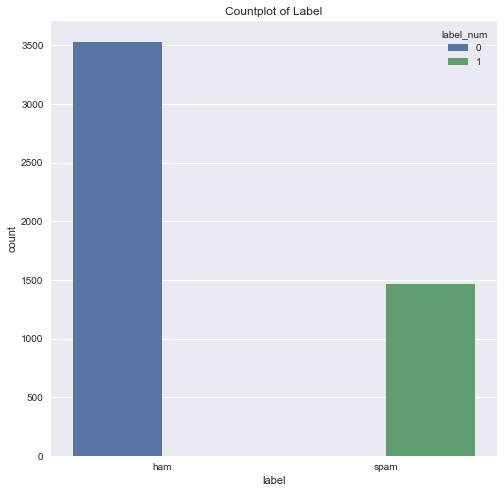

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='label', hue='label_num').set(title='Countplot of Label')

From the plot, there are lesser spam mails.

## Text

#### Spam mails

In [30]:
bigrams_series_spam = (pd.Series(ngrams(words_spam, 2)).value_counts())[:10]

Text(0.5, 0, '# of Occurences')

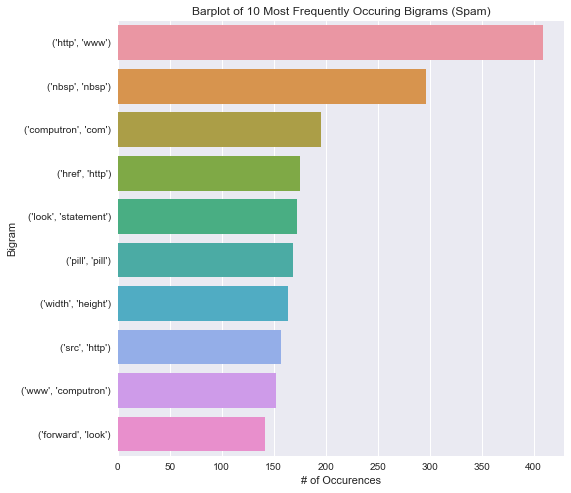

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(y=bigrams_series_spam.index, x=bigrams_series_spam.values).set(title='Barplot of 10 Most Frequently Occuring Bigrams (Spam)')
plt.ylabel('Bigram')
plt.xlabel('# of Occurences')

From the plot, spam mails usually contain web links.

#### Ham mails

In [32]:
bigrams_series_ham = (pd.Series(ngrams(words_ham, 2)).value_counts())[:10]

Text(0.5, 0, '# of Occurences')

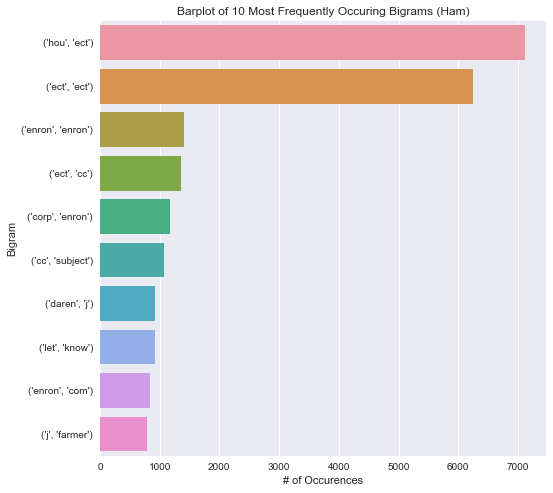

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(y=bigrams_series_ham.index, x=bigrams_series_ham.values).set(title='Barplot of 10 Most Frequently Occuring Bigrams (Ham)')
plt.ylabel('Bigram')
plt.xlabel('# of Occurences')

From the plot, normal (ham) mails usually contain corporate related information.

## Length

In [34]:
df[df['label'] == 'spam'].describe()

,label_num,length
count,1462.0,1462.000000
mean,1.0,1249.326265
std,0.0,1840.112883
min,1.0,11.000000
25%,1.0,304.250000
50%,1.0,589.000000
75%,1.0,1305.000000
max,1.0,22073.000000


In [35]:
df[df['label'] == 'ham'].describe()

,label_num,length
count,3531.0,3531.000000
mean,0.0,994.939394
std,0.0,1402.785831
min,0.0,18.000000
25%,0.0,241.000000
50%,0.0,538.000000
75%,0.0,1253.500000
max,0.0,32258.000000


<AxesSubplot:xlabel='length', ylabel='label'>

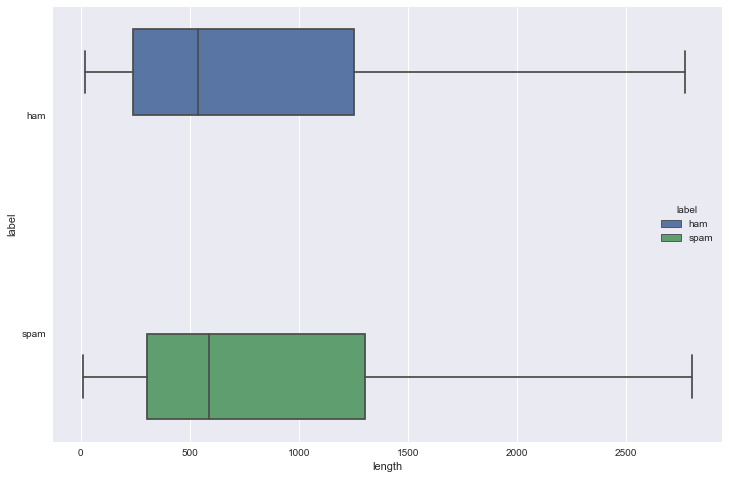

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='label', x='length', hue='label', showfliers = False)

From the histogram, spam emails tend to have more characters in the interquantile range (25% to 75%).

|  | Ham Length | Spam Length |
|--|-----|------|
|mean|994.939394|`1249.326265`|
|min|`18.00`|11.000000|
|25%|241.00|`304.25`|
|50%|538.00|`589.00`|
|75%|1253.50|`1305.00`|
|max|`32258.00`|22073.00|

# Conclusion

From the above findings, we can clearly see that number of samples of Ham is much more than that of Spam which implies that the dataset we are using is imbalanced. To balance the data, we need to downsample Ham. 

Spam and Ham 'text' contains different most common bigrams which needs to be converted into vectors with the corresponding words token id's before fitting into the machine learning model. 

'length' should be dropped as has little correlation to 'label_num'.